In [10]:
!pip install wget

In [12]:
import wget
wget.download('https://bit.ly/fruits_300')

100% [....................................................................] 3000128 / 3000128

ValueError: not enough values to unpack (expected 2, got 1)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [10]:
fruits[0, :, :]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

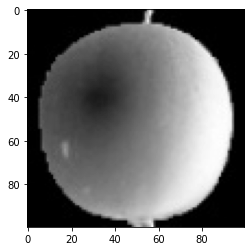

In [60]:
plt.imshow(fruits[0, :, :], cmap='gray')

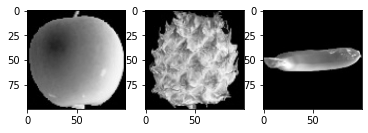

In [23]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(fruits[50, :, :], cmap='gray')
axs[1].imshow(fruits[150, :, :], cmap='gray')
axs[2].imshow(fruits[250, :, :], cmap='gray')
plt.show()

In [29]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [30]:
apple.shape

(100, 10000)

In [31]:
apple[:3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [32]:
np.mean(apple, axis=0)

array([1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ])

In [33]:
np.mean(pineapple, axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
np.mean(banana, axis=0)

array([1.1 , 1.07, 1.1 , ..., 1.  , 1.  , 1.  ])

In [ ]:
# 이미지 군집별 벡터의 패턴이 다름..

<BarContainer object of 10000 artists>

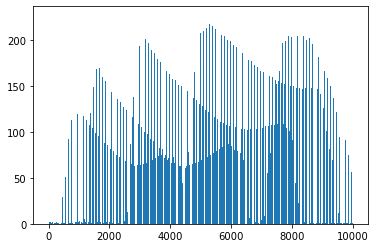

In [37]:
# apple column 평균의 bar..
plt.bar(range(10000), np.mean(apple, axis=0))

<BarContainer object of 10000 artists>

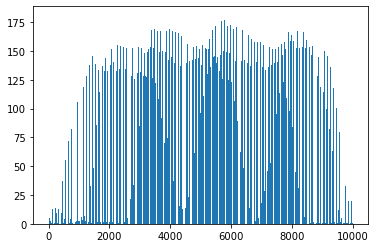

In [39]:
# pineapple column 평균의 bar..
plt.bar(range(10000), np.mean(pineapple, axis=0))

<BarContainer object of 10000 artists>

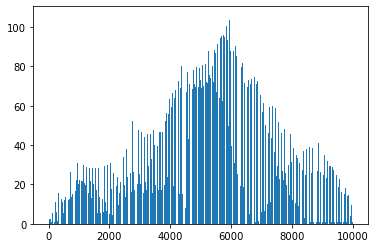

In [38]:
# banana column 평균의 bar..
plt.bar(range(10000), np.mean(banana, axis=0))

In [ ]:
# 각 군집별 평균이 이미지 (이미지 군집별 픽셀값들의 평균)

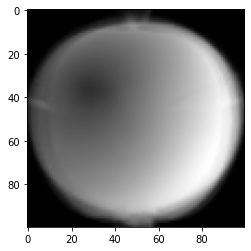

In [41]:
plt.imshow(np.mean(apple, axis=0).reshape(100,100), cmap='gray')

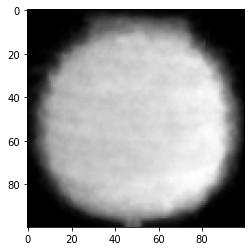

In [42]:
plt.imshow(np.mean(pineapple, axis=0).reshape(100,100), cmap='gray')

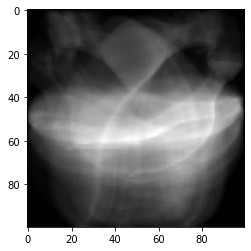

In [43]:
plt.imshow(np.mean(banana, axis=0).reshape(100,100), cmap='gray')

In [ ]:
# 평균값과 가장 유사한 이미지를 고르기..

In [45]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

In [ ]:
# 군집이미지 픽셀평균값과 개별 이미지 픽셀값과의 차..

In [48]:
abs_diff = np.abs(fruits - apple_mean)
abs_diff.shape

(300, 100, 100)

In [50]:
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


In [52]:
print(abs_mean)

[17.37576  13.508874 17.183394 15.68311  17.983306 20.565392 16.795812
 16.144276 19.611994 21.32059  16.454222 16.590134 13.37039  17.23263
 15.92806  15.496638 18.582212 16.48196  27.651556 19.7871   20.826912
 16.417934 17.059946 15.904296 15.086176 19.371364 24.076362 14.777732
 19.20517  20.805182 14.797906 18.658418 15.973216 13.04259  18.381052
 16.59904  16.288504 18.960586 13.88574  16.497594 18.40376  19.174642
 29.096702 18.40849  28.223962 21.42994  19.740466 15.590532 13.082678
 18.765996 14.391198 21.464746 26.261028 15.887148 18.568706 16.410426
 17.108034 13.178824 18.199846 13.503056 20.845032 16.898184 22.81774
 18.99896  19.102706 16.636216 14.845644 19.357872 14.778086 14.468082
 13.085526 15.946606 20.42774  16.241996 13.720382 18.416166 15.229106
 16.411342 13.47148  20.050622 17.296816 21.071312 18.451708 19.645494
 15.585712 20.582004 13.850318 13.269222 21.875262 17.152098 15.60477
 23.890138 14.442124 18.794826 15.750524 16.58135  19.375552 17.802096
 15.47841

In [ ]:
# 픽셀값의 차의 평균값이 작은 순으로 정렬된 인덱스..

In [56]:
apple_index = np.argsort(abs_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42],
      dtype=int64)

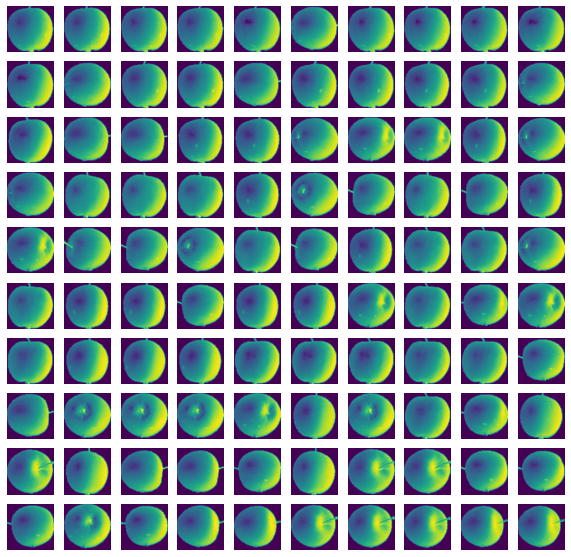

In [59]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]])
        axs[i,j].axis('off')
plt.show()    

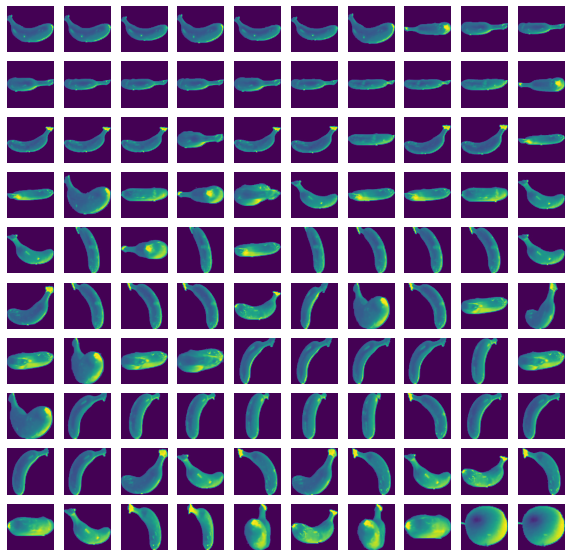

In [61]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
banana_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10 + j]])
        axs[i,j].axis('off')
plt.show()   

### KMeans Clustering
- 0. random하게 k개의 점을 찍는다
- 1. 모든 데이터를 k개의 점과의 거리를 기준으로 묶는다
- 2 .모든 데이터가 k개의  그룹이 생성
- 3 .k개의 그룹의 중심점을 계산해서 각 그룹의 center point로 지정..
- 4. 1~3까지의 과정을 반복
- 5. 더 이상의 그룹의 변화가 없을 때, 반복을 멈춤..

In [11]:
import wget
!wget https://bit.ly/fruits_300 -0 fruits_300.npy

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [16]:
fruits = np.load('fruits_300.npy')
fruits

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [17]:
fruits.shape

(300, 100, 100)

In [18]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=111)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=111)

In [23]:
km.labels_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 98,  91, 111], dtype=int64))

In [26]:
fruits[km.labels_ == 1].shape

(91, 100, 100)

TypeError: 'method' object is not subscriptable

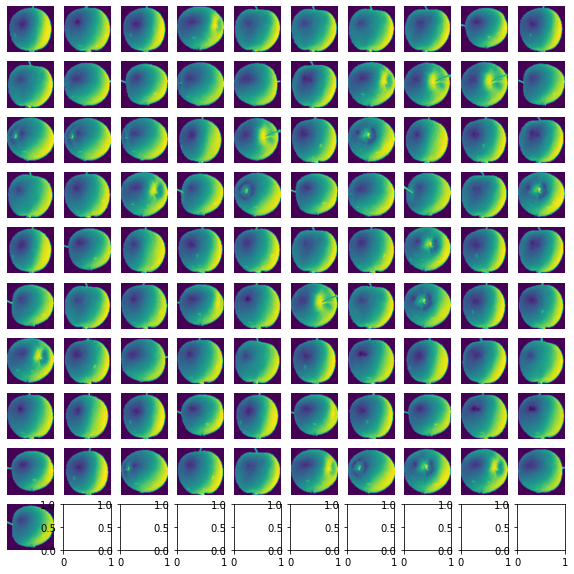

In [31]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        if (i*10 + j) <= len(fruits[km.labels_ == 1])-1:
            axs[i,j].imshow(fruits[km.labels_ == 1][i*10 + j])
            axs[i,j].axis('off')
        else:
            axs[i,j].axis['off']
plt.show()    

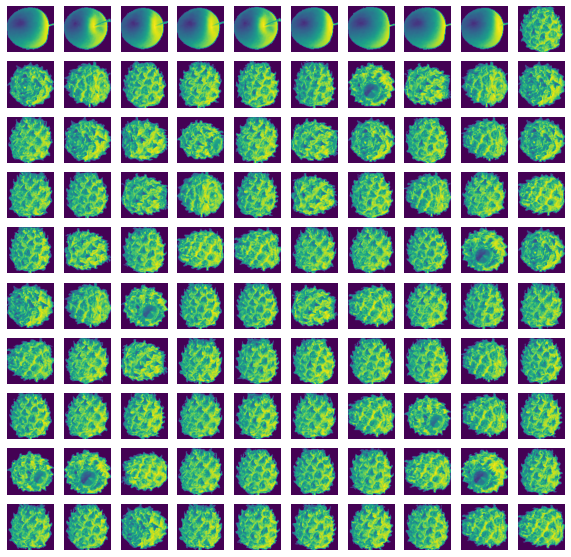

In [32]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        if (i*10 + j) <= len(fruits[km.labels_ == 2])-1:
            axs[i,j].imshow(fruits[km.labels_ == 2][i*10 + j])
            axs[i,j].axis('off')
        else:
            axs[i,j].axis['off']
plt.show() 

TypeError: 'method' object is not subscriptable

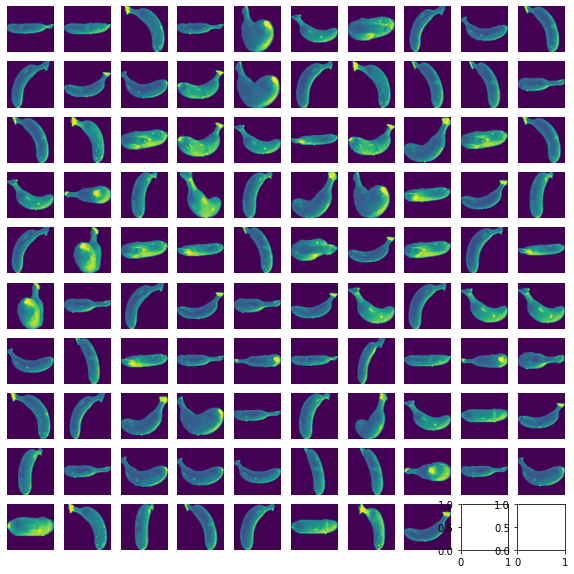

In [35]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        if (i*10 + j) <= len(fruits[km.labels_ == 0])-1:
            axs[i,j].imshow(fruits[km.labels_ == 0][i*10 + j])
            axs[i,j].axis('off')
        else:
            axs[i,j].axis['off']
plt.show() 

In [ ]:
# 클러스터의 중심점 => 그래프....

In [36]:
km.cluster_centers_

array([[1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [37]:
km.cluster_centers_.shape

(3, 10000)

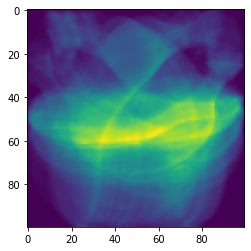

In [41]:
plt.imshow(km.cluster_centers_[0].reshape(100,100))

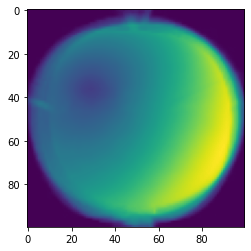

In [42]:
plt.imshow(km.cluster_centers_[1].reshape(100,100))

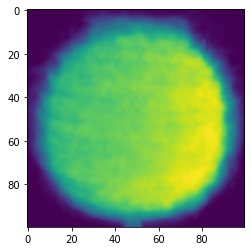

In [43]:
plt.imshow(km.cluster_centers_[2].reshape(100,100))

In [ ]:
# inertia_  : 군집 내의 분산의 크기

# inertia가 크면 군집 내 데이터의 흩어짐이 크다, 작으면 군집 내 데이터의 흩어짐이 작다..
# inertia가 작을 수록 클러스터링이 잘 되었다고 평가..
# 군집의 수를 늘릴수록 inertia는 작아진다.. 무조건 inertia가 작은 것이 좋은 것이 아니다..
# 최적의 군집수는 inertia가 급격히 감소하는 지점이고, 더 이상 inertia의 감소폭이 작으면 군집을 
# 나누는 실효성이 낮다.

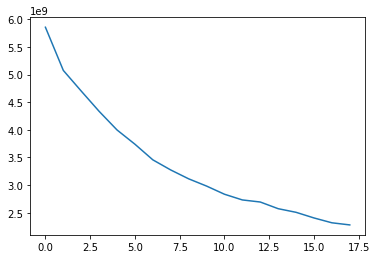

In [47]:
inertia = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=20)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
    
plt.plot(range(len(inertia)), inertia)
plt.show()